<a href="https://colab.research.google.com/github/utkarshs75/PlayStore-Data-Analysis/blob/main/Play_Store_App_review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing datasets from drive and saving in variables.
path1 = '/content/drive/MyDrive/AB_Capstone/Play Store Data.csv'
path2 = '/content/drive/MyDrive/AB_Capstone/User Reviews.csv'
data = pd.read_csv(path1)
rev = pd.read_csv(path2)

# Analysing Playstore Dataset

The primary dataset is saved in the variable named data. As can be observed, it contains 13 columns.

In [ ]:
#To get a data overview.
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Checking the number of empty values in the columns
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#Statistical Overview
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


# Data Cleaning

From a preliminary review of the data, 6 columns need to be of numeric data-type.

Namely: 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated'.

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Cleaning Reviews column

review = [i for i in data['Reviews']]

def clean_review(rev_list):
  clean = []
  for rev in rev_list:
    if 'M' in rev:
      rev = rev.replace('M','')
      clean.append(float(rev))
    else:
      clean.append(float(rev))
  return clean

data['Reviews'] = clean_review(review)
data['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

In [ ]:
#Checking for abbarant values in the Size column

x=[i for i in data['Size']]
print(set(x))
x.count('Varies with device')

{'916k', '663k', '8.4M', '1.1M', '63M', '373k', '28M', '562k', '61M', '1.8M', '29M', '6.2M', '986k', '116k', '643k', '9.4M', '79k', '881k', '79M', '885k', '7.3M', '951k', '1.6M', '779k', '82k', '430k', '478k', '82M', '1.5M', '108k', '314k', '840k', '656k', '118k', '981k', '1,000+', '1.3M', '74k', '50k', '18k', '306k', '27k', '930k', '75M', '11M', '7.7M', '4.3M', '29k', '716k', '190k', '378k', '4.9M', '245k', '485k', '544k', '54k', '40M', '2.9M', '847k', '2.7M', '523k', '812k', 'Varies with device', '364k', '9.9M', '44k', '619k', '598k', '728k', '97M', '12M', '545k', '837k', '609k', '953k', '210k', '7.0M', '42M', '8.5M', '404k', '186k', '629k', '5.0M', '19M', '67M', '414k', '785k', '23k', '6.5M', '9.1M', '874k', '41k', '473k', '334k', '7.1M', '842k', '322k', '209k', '92M', '3.8M', '53M', '4.5M', '77M', '10.0M', '872k', '809k', '7.2M', '157k', '4.8M', '16M', '153k', '3.0M', '243k', '46M', '43M', '942k', '6.8M', '61k', '5.8M', '7.6M', '3.2M', '787k', '4.6M', '939k', '240k', '5.5M', '219k'

1695

In [ ]:
#Cleaning Size column

index =  data[data['Size'] == '1,000+'].index
data.drop(axis = 0, inplace=True, index = index)

size = [i for i in data['Size']]

def clean_size(size_list):
  clean = []
  for i in size_list:
    if 'M' in i:
      i = i.replace('M','')
      clean.append(float(i))
    elif 'k' in i:
      i = i.replace('k','')
      clean.append(float(i)/1024)
    elif 'Varies with device' in i:
      i = i.replace('Varies with device','0')
      clean.append(float(i))
    else:
      clean.append(float(i))
  return clean

data['Size'] = clean_size(size)
data['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [ ]:
#Cleaning Installs column

installs = [i for i in data['Installs']]

def clean_installs(installs_list):
    clean_installs = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',','')
        if '+' in install:
            install = install.replace('+','')
        if 'Free' in install:
            install = install.replace('Free','0')
        #install = int(install)
        clean_installs.append(install)
    return clean_installs


data['Installs'] = clean_installs(installs)
data['Installs'] = data['Installs'].astype(float)
data['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

In [ ]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
#Cleaning price column

price = [i for i in data['Price']]

def clean_price(prices):
  clean = []
  for i in prices:
    if '$' in i:
      i = i.replace('$','')
      clean.append(float(i))
    else:
      clean.append(float(i))
  return clean

data['Price'] = clean_price(price)
data['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [ ]:
#Cleaning Last Updated column

data['Last Updated'] = data['Last Updated'].str[-4:]
index = data[data['Last Updated'] == '0.19'].index
data.drop(axis=0, inplace=True, index=index)
data['Last Updated'] = data['Last Updated'].astype(int)

Next, we handle the missing values by eplacing with the median in ratings and with mode in the remaining columns

In [ ]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# Replcing with medians in Ratings
def replace_vals(missing_vals):

    return missing_vals.fillna(missing_vals.median())

data['Rating'] = data['Rating'].transform(replace_vals)
data['Rating'] = data['Rating'].astype(float)

# Remove the single record with missing 'Type' value
index = data[data['Type'].isna()].index
data.drop(axis=0, inplace=True, index=index)

In [ ]:
# Replacing the Current Version and Android Version with mode

data['Current Ver'].fillna(data['Current Ver'].mode().values[0], inplace = True)
data['Android Ver'].fillna(data['Android Ver'].mode().values[0], inplace = True)


# Check if there is any missing data left 
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10839.0,4.206467e+00,4.803633e-01,1.0,4.1,4.3,4.5,5.000000e+00
Reviews,10839.0,4.441939e+05,2.927893e+06,0.0,38.0,2094.0,54783.0,7.815831e+07
Size,10839.0,1.815346e+01,2.217119e+01,0.0,2.6,9.2,26.0,1.000000e+02
Installs,10839.0,1.546577e+07,8.503315e+07,0.0,3000.0,100000.0,5000000.0,1.000000e+09
Price,10839.0,1.027463e+00,1.595044e+01,0.0,0.0,0.0,0.0,4.000000e+02
Last Updated,10839.0,2.017400e+03,1.100950e+00,2010.0,2017.0,2018.0,2018.0,2.018000e+03


# Analysing User Reviews Table

The user reviews dataset contains 5 columns

In [ ]:
#To get a data overview.
rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#Checking the number of unique apps for which review data is provided
len(list(rev['App'].unique()))

1074

In [ ]:
#Information about the review data
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
rev.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# Dropping all empty review rows
rev.dropna(inplace = True)
rev.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
#Checking the shape of Data
rev.shape

(37427, 5)

In [ ]:
## Merge the two datasets based on App and keep only the required Columns
merged_df = rev.merge(data, on = "App")
merged_df.drop(['Rating','Reviews','Size','Installs', 'Type','Price','Content Rating',	'Genres','Last Updated','Current Ver','Android Ver'], axis = 1)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS
...,...,...,...,...,...,...
72600,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,LIFESTYLE
72601,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,LIFESTYLE
72602,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,LIFESTYLE
72603,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,LIFESTYLE


In [ ]:
merged_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
dtype: int64

In [ ]:
rev.describe().T

,count,mean,std,min,25%,50%,75%,max
Sentiment_Polarity,37427.0,0.182171,0.351318,-1.0,0.000000,0.150000,0.40,1.0
Sentiment_Subjectivity,37427.0,0.492770,0.259904,0.0,0.357143,0.514286,0.65,1.0


# Technical Insights from Data

In [ ]:
# Top 10 most Installed Apps
df = data.groupby(by =['App', 'Category'])[['Installs']].sum().reset_index()
df = df.sort_values(by = 'Installs',ascending=False).head(10)
df
# Highest Installed Category is Game

,App,Category,Installs
8150,Subway Surfers,GAME,6.000000e+09
4975,Google Photos,PHOTOGRAPHY,4.000000e+09
5160,Hangouts,COMMUNICATION,4.000000e+09
4962,Google Drive,PRODUCTIVITY,4.000000e+09
5444,Instagram,SOCIAL,4.000000e+09
4971,Google News,NEWS_AND_MAGAZINES,4.000000e+09
6216,Messenger – Text and Video Chat for Free,COMMUNICATION,3.000000e+09
2377,Candy Crush Saga,GAME,3.000000e+09
4907,Gmail,COMMUNICATION,3.000000e+09
9122,WhatsApp Messenger,COMMUNICATION,3.000000e+09


In [ ]:
# Top 10 (Most popular) Apps with Highest number of Reviews
df = data.groupby(by = ['App','Category'])[['Reviews']].sum().reset_index()
df = df.sort_values(by = 'Reviews',ascending=False).head(10)
df

# Game category seems to have the most number of reviews

,App,Category,Reviews
5444,Instagram,SOCIAL,266241989.0
9122,WhatsApp Messenger,COMMUNICATION,207348304.0
6216,Messenger – Text and Video Chat for Free,COMMUNICATION,169932272.0
8150,Subway Surfers,GAME,166331958.0
4359,Facebook,SOCIAL,156286514.0
2583,Clash of Clans,GAME,134677334.0
2377,Candy Crush Saga,GAME,134573681.0
101,8 Ball Pool,GAME,85201288.0
2579,Clash Royale,GAME,69405018.0
7958,Snapchat,SOCIAL,68045010.0


In [ ]:
# Bottom 10 (Least popular) Apps with Lowest number of Reviews
df = data.groupby(by = ['App','Category'])[['Reviews']].sum().reset_index()
df = df.sort_values(by = 'Reviews', ascending=True).head(10)
df

,App,Category,Reviews
5999,MD PAWS AH,MEDICAL,0.0
1076,BH Connect,SOCIAL,0.0
1080,BH Mission Playbook,TRAVEL_AND_LOCAL,0.0
1081,BH Online,FINANCE,0.0
4248,FK Jelgava,SPORTS,0.0
6787,Oklahoma Ag Co-op Council,COMMUNICATION,0.0
1088,BI Barcode Scanner,PRODUCTIVITY,0.0
6793,On a Bu Pour Vous OBPV,LIFESTYLE,0.0
1099,BJ - Confidential,COMMUNICATION,0.0
3337,Dive-Store.ch,SPORTS,0.0


In [ ]:
# Top 10 most expensive Apps 
df = data.groupby(by =['App', 'Category']) [['Price']].sum().reset_index()
# we get the sum of price of every uique app but lets sort them Descending by price
df = df.sort_values(by = 'Price', ascending=False).head(10) 
df

,App,Category,Price
5371,I'm Rich - Trump Edition,LIFESTYLE,400.00
9623,most expensive app (H),FAMILY,399.99
5372,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,399.99
5346,I Am Rich Pro,FAMILY,399.99
9739,💎 I'm rich,LIFESTYLE,399.99
5359,I am Rich,FINANCE,399.99
5361,I am Rich Plus,FAMILY,399.99
5363,I am Rich!,FINANCE,399.99
5365,I am rich,LIFESTYLE,399.99
5366,I am rich (Most expensive app),FINANCE,399.99


In [ ]:
# Top 10 (most profitable) highest revenue generating Apps
df = data.groupby(by =['App', 'Category', 'Installs']) [['Price']].sum().reset_index()
df['Revenue'] = df['Price']*df['Installs']
df = df.sort_values(by = 'Revenue', ascending=False).head(10)
df

,App,Category,Installs,Price,Revenue
6266,Minecraft,FAMILY,10000000.0,13.98,139800000.0
5369,I am rich,LIFESTYLE,100000.0,399.99,39999000.0
5349,I Am Rich Premium,FINANCE,50000.0,399.99,19999500.0
4371,Facetune - For Free,PHOTOGRAPHY,1000000.0,17.97,17970000.0
5244,Hitman Sniper,GAME,10000000.0,0.99,9900000.0
5325,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,100000.0,74.97,7497000.0
5002,Grand Theft Auto: San Andreas,GAME,1000000.0,6.99,6990000.0
7928,Sleep as Android Unlock,LIFESTYLE,1000000.0,5.99,5990000.0
3460,DraStic DS Emulator,GAME,1000000.0,4.99,4990000.0
1513,Beautiful Widgets Pro,PERSONALIZATION,1000000.0,4.98,4980000.0


In [ ]:
# Top 10 most Biggest Apps by size

df = data.groupby(by =['App', 'Category'])[['Size']].sum().reset_index()
df = df.sort_values(by = 'Size',ascending=False).head(10)
df

,App,Category,Size
734,Angry Birds Classic,GAME,485.0
8150,Subway Surfers,GAME,456.0
9372,Zombie Catchers,GAME,450.0
2377,Candy Crush Saga,GAME,444.0
6176,MeetMe: Chat & Meet New People,SOCIAL,380.0
8376,Temple Run 2,GAME,372.0
9213,Wordscapes,GAME,348.0
7367,ROBLOX,GAME,335.0
8330,Talking Tom Gold Run,GAME,312.0
101,8 Ball Pool,GAME,312.0


In [ ]:
# Top 20 Oldest Decomissioned Apps

df = data[['App', 'Category','Last Updated']].sort_values(by = ['Last Updated'], ascending = True)
df

,App,Category,Last Updated
7479,FML F*ck my life + widget,FAMILY,2010
8418,DEER HUNTER CHALLENGE,GAME,2011
7237,CF-Bench Pro,TOOLS,2011
4439,Band O'Clock,LIFESTYLE,2011
10460,Wi-Fi Rabbit Unlock Key,TOOLS,2011
...,...,...,...
3689,VPlayer,VIDEO_PLAYERS,2018
3691,Samsung Video Library,VIDEO_PLAYERS,2018
3692,OnePlus Gallery,VIDEO_PLAYERS,2018
3671,Video Player All Format,VIDEO_PLAYERS,2018


In [ ]:
# Bottom 10 (Least popular) worst rated apps

df = data[['App', 'Category','Rating']].sort_values(by = ['Rating'], ascending = True)
df.head(10)

,App,Category,Rating
8820,DS Creator 2.0,TOOLS,1.0
4127,Speech Therapy: F,FAMILY,1.0
10324,FE Mechanical Engineering Prep,FAMILY,1.0
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0
625,House party - live chat,DATING,1.0
7806,CR Magazine,BUSINESS,1.0
5978,Truck Driving Test Class 3 BC,FAMILY,1.0
7427,CJ DVD Rentals,COMMUNICATION,1.0
7144,CB Mobile Biz,FINANCE,1.0
7383,Thistletown CI,PRODUCTIVITY,1.0


# Plotting all Data

In [ ]:
# Setting the Parameters for plots
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (15, 12)
sns.set(font_scale=2)
plt.rcParams['figure.facecolor'] = '#80050001'

Text(0.5, 1.0, 'Top categories on Google Playstore')

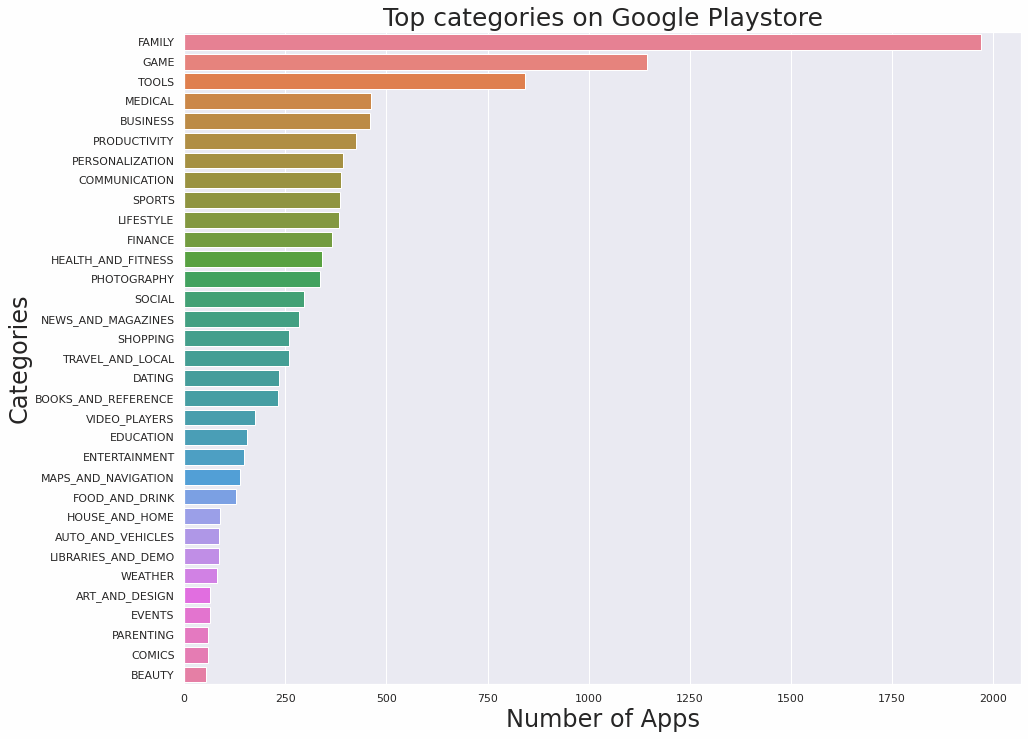

In [ ]:
# 1.Number of apps in each category 
x = data['Category'].value_counts()
y = data['Category'].value_counts().index

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

graph = sns.barplot(x= x, y=y, palette = 'husl')
graph.set(xlabel = 'Number of Apps', ylabel = 'Categories')
graph.set_title("Top categories on Google Playstore", fontsize = 25)

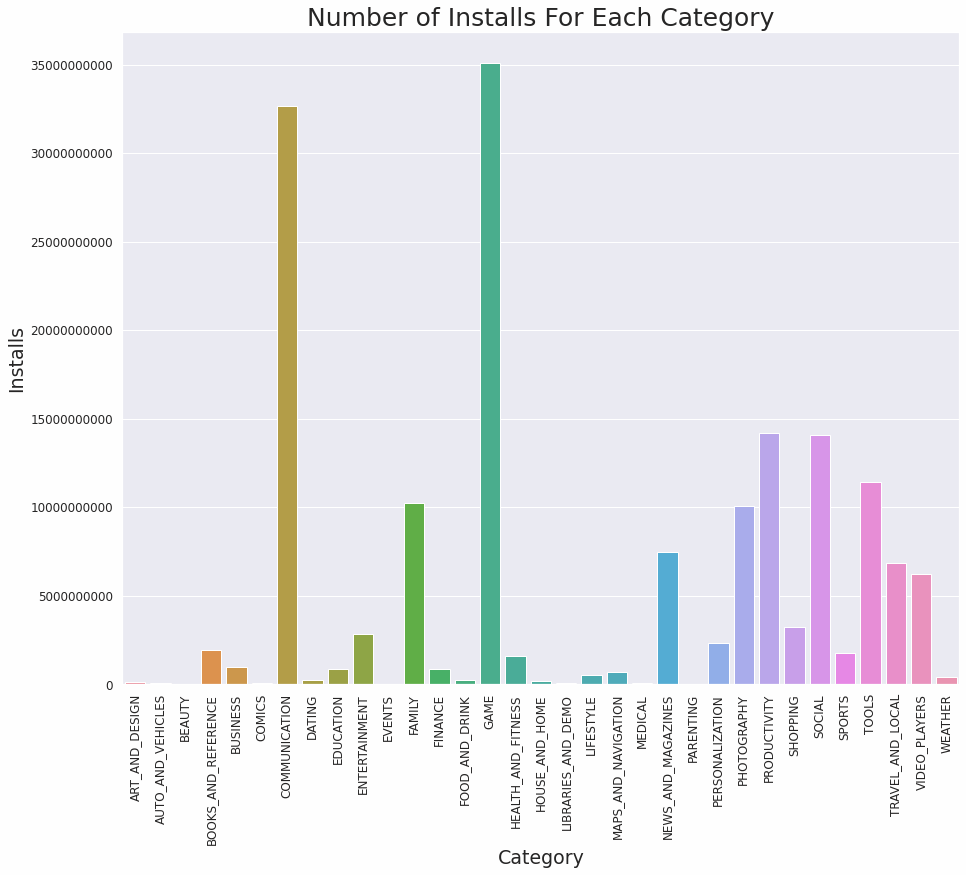

In [ ]:
# 2. Find category that is used the most based on number of installs

categories = data.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  

graph = sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)

graph.set_xlabel('Category', fontsize = 19)
graph.set_ylabel('Installs', fontsize = 19)

graph.tick_params(labelsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of Installs For Each Category',fontsize = 25)
plt.show()

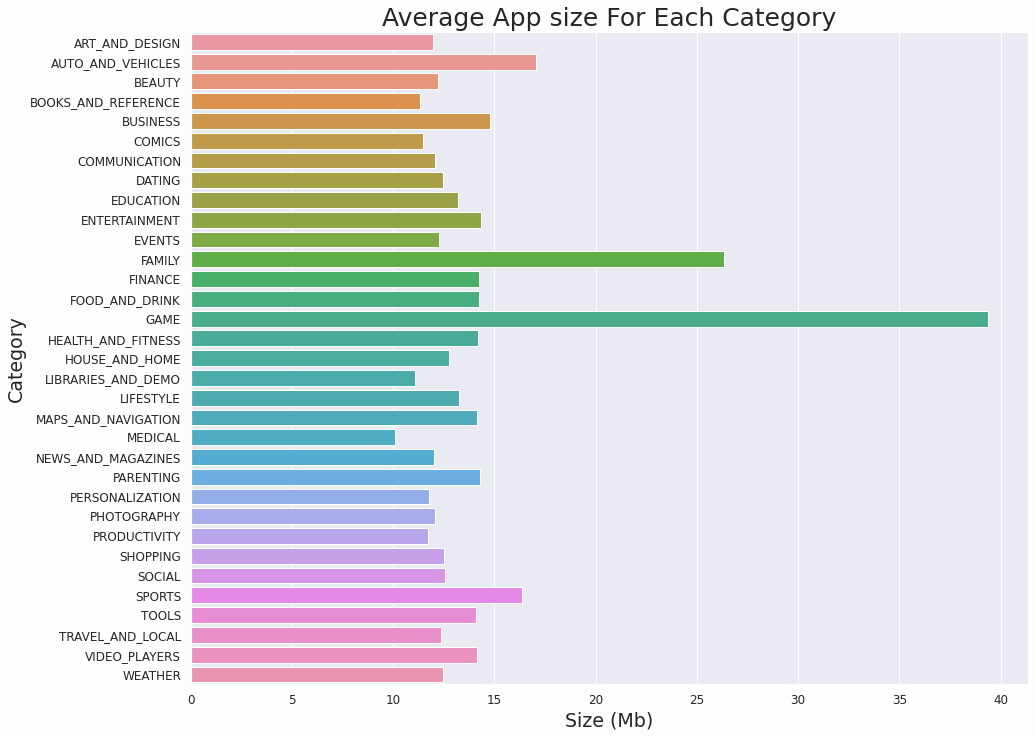

In [ ]:
# 3. Distribution of App Sizes

x = data['Category'].value_counts().reset_index().sort_values(by = ['index'])
categories = data.groupby('Category')
category_size_sum_df = categories[['Size']].sum().sort_values(by = ['Size'], ascending = False)
category_size_sum_df = category_size_sum_df.reset_index()
category_size_sum_df = category_size_sum_df.sort_values(by = ['Category'], ascending = True)
category_size_sum_df['Size'] = category_size_sum_df['Size']/x['Category']
category_size_sum_df

graph = sns.barplot(x='Size', y='Category', data=category_size_sum_df)
plt.xticks(size = 11)
plt.yticks(size = 11)

graph.set_xlabel('Size (Mb)', fontsize = 19)
graph.set_ylabel('Category', fontsize = 19)

graph.tick_params(labelsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Average App size For Each Category',fontsize = 25)
plt.show()

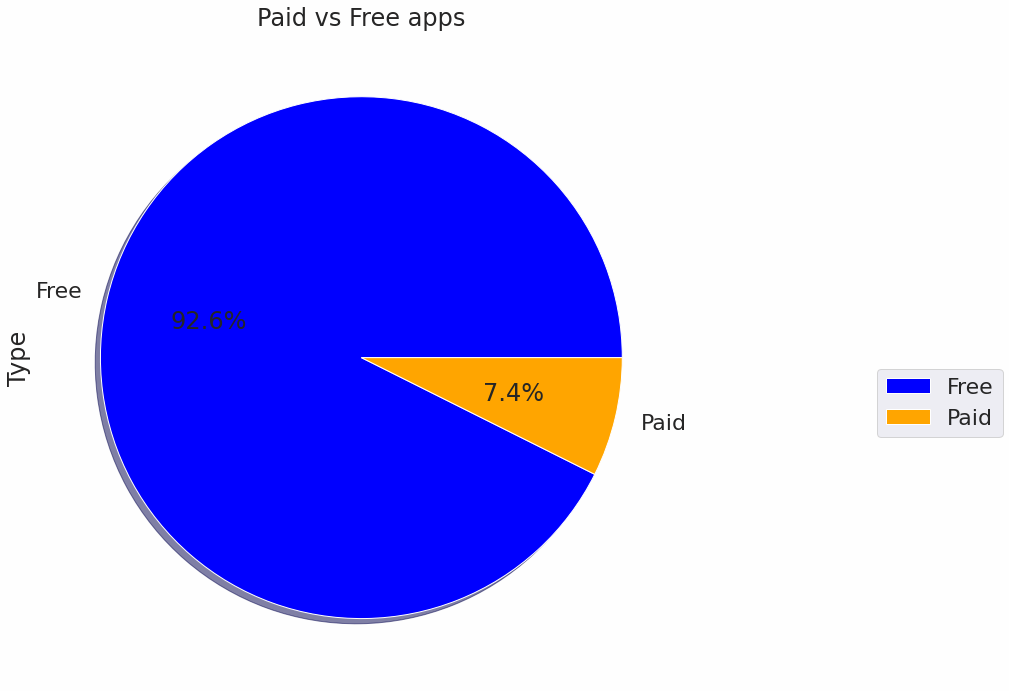

In [ ]:
# 4. No. of paid vs free apps distribution

pie = data['Type'].value_counts(sort=True)
pie.plot(kind = 'pie', autopct='%1.1f%%', legend = True, colors = ["blue","orange"], shadow = True)
plt.title('Paid vs Free apps')
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))
plt.show()

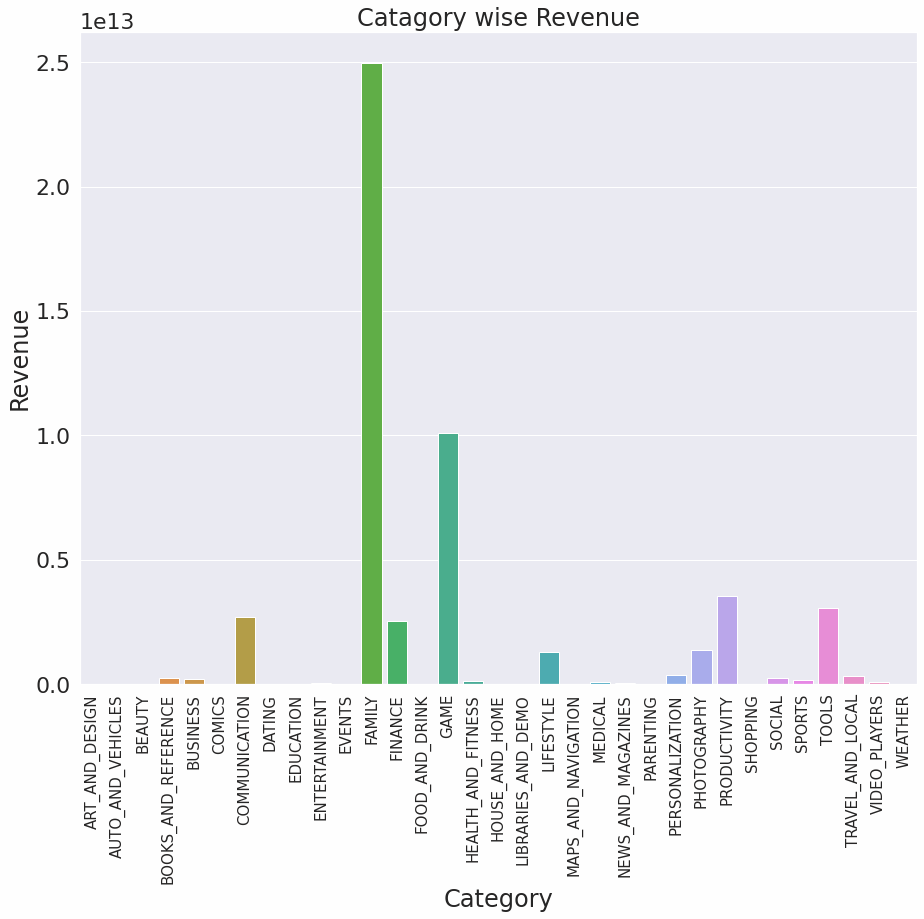

In [ ]:
# 5. Graph showing revenue generated by each catagory through paid apps.
categories = data.groupby('Category')
category_price_sum_df = categories[['Price']].sum()
category_installs_sum_df = categories[['Installs']].sum()
box = pd.concat([category_price_sum_df, category_installs_sum_df], axis = 1)
box['Revenue'] = box['Price']*box['Installs']
#print(box)

sns.barplot(x = box.index, y = 'Revenue', data = box).set(title = 'Catagory wise Revenue')
plt.xticks(rotation=90, size = 15)
plt.show()

In [ ]:
# 6. Visualizing a relationship between revenue, installs and no. of apps in each category

a = data['Category'].value_counts().reset_index().sort_values(by = ['index']).reset_index()
b = categories[['Installs']].sum().reset_index()
b['No. of Apps'] = a['Category']
b['Revenue'] = box.reset_index()['Revenue']
b['Revenue'] = b['Revenue'].replace([0],1)
b['Installs'] = np.log10(b['Installs'])
b['No. of Apps'] = np.log10(b['No. of Apps'])
b['Revenue'] = np.log10(b['Revenue'])
b = b.sort_values(by = ['Revenue'], ascending = True, ignore_index = True)

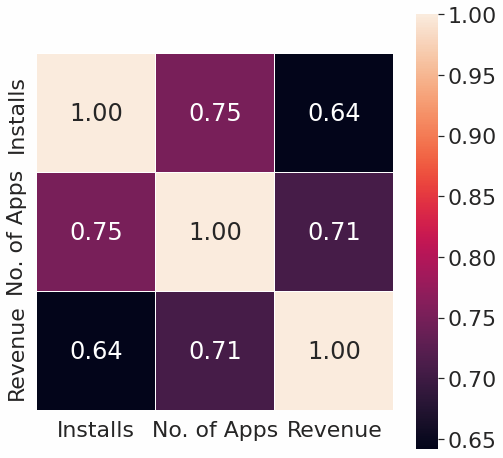

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(b.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

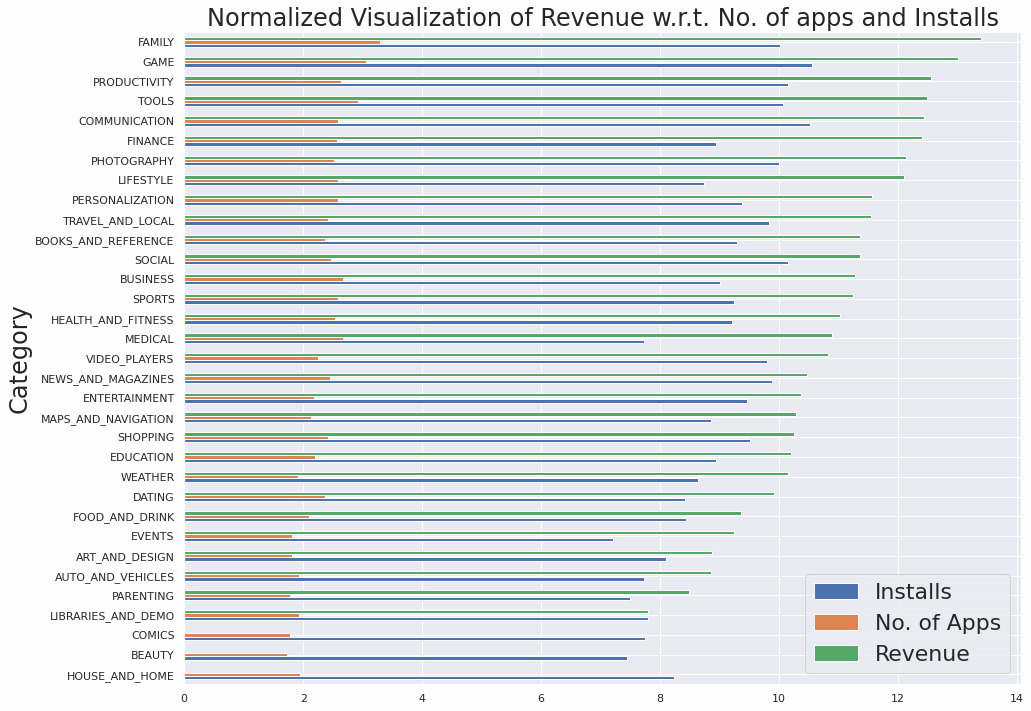

In [ ]:
# 7. Visualizing the same correlation on the same graph
b.plot(x="Category", y=["Installs", "No. of Apps", 'Revenue'], kind="barh")
plt.title('Normalized Visualization of Revenue w.r.t. No. of apps and Installs')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

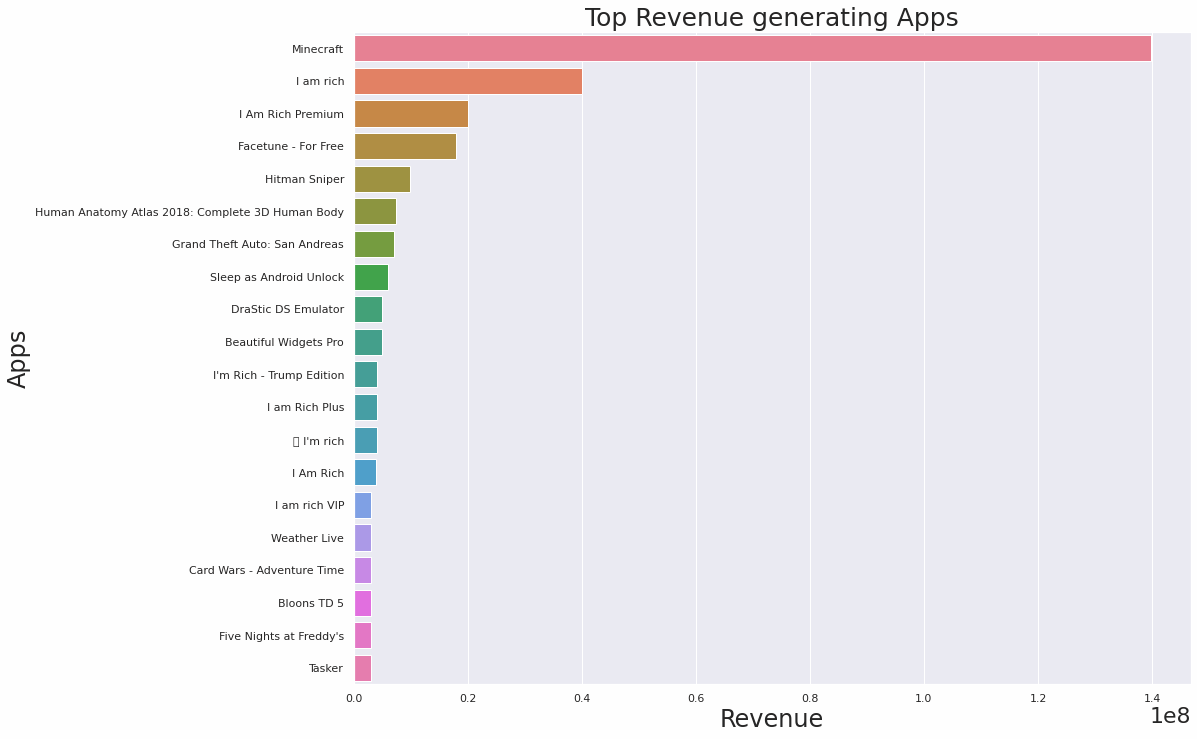

In [ ]:
# 8. Top 20 revenue generating Apps 
df = data.groupby(by =['App', 'Category', 'Installs']) [['Price']].sum().reset_index()
df['Revenue'] = df['Price']*df['Installs']
df = df.sort_values(by = 'Revenue', ascending=False).head(20) 

plt.xticks(size = 11)
plt.yticks(size = 11)
graph = sns.barplot(x = df['Revenue'], y = df['App'], palette = 'husl')
graph.set(xlabel = 'Revenue', ylabel = 'Apps')
graph.set_title("Top Revenue generating Apps", fontsize = 25)
plt.show()

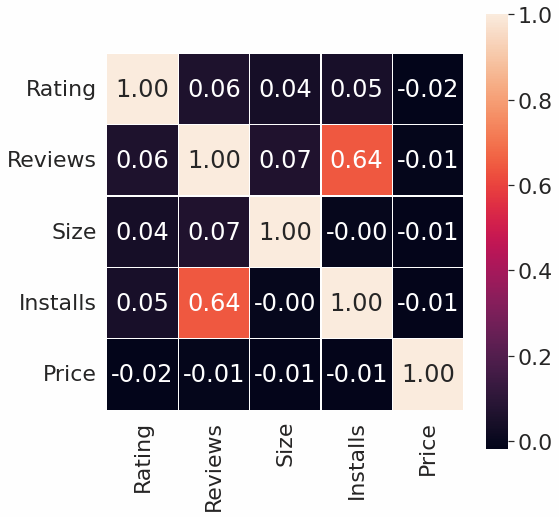

In [ ]:
# 9.Correlation between no. of review, ratings, size, price and no. of installs

cols = list(data.columns)
cols.remove('Last Updated')
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(data[cols].corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

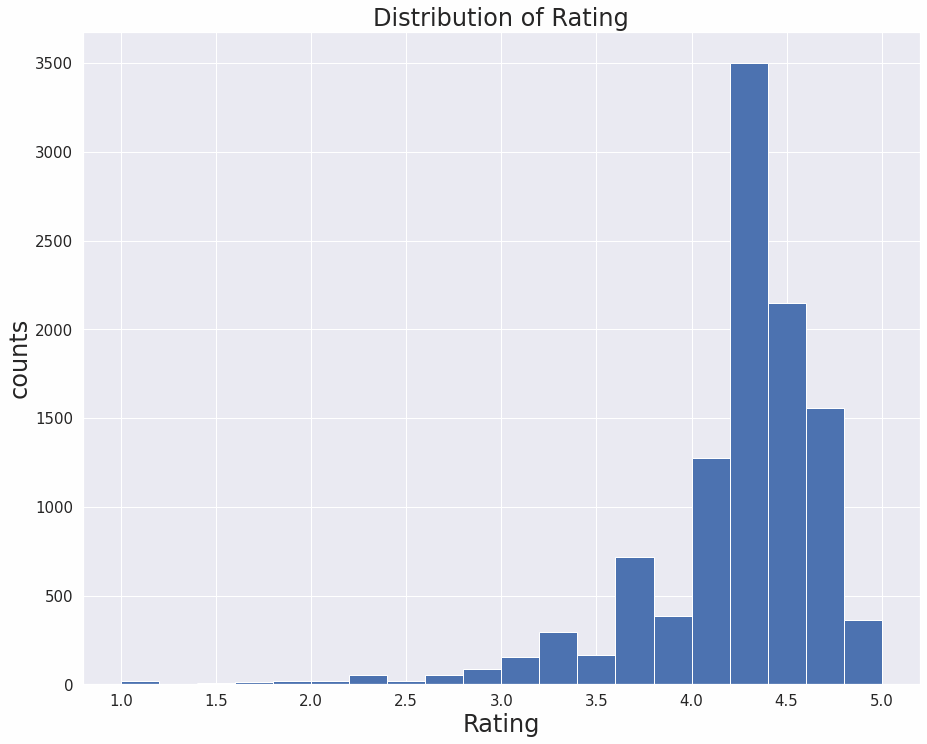

In [ ]:
# 10. Overall Rating Distribution

plt.hist((data['Rating']), bins = 20)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.title('Distribution of Rating')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

The graph below displays a possible overview of apps' ratings. Some apps have a more uniform rating distribution than others, indicating a balanced distribution.
"
Mostly the graph can be used to understand the spread of ratings in an app catagory. Like the apps in the education in general have received good ratings, and very rare bad ratings.
Similar is the case with comics and beauty, as opposed to finance or productivity, which seem to have a smaller upper IQR [<5], and a huge amount of low ratings. Meaning that they require attention and development.
"

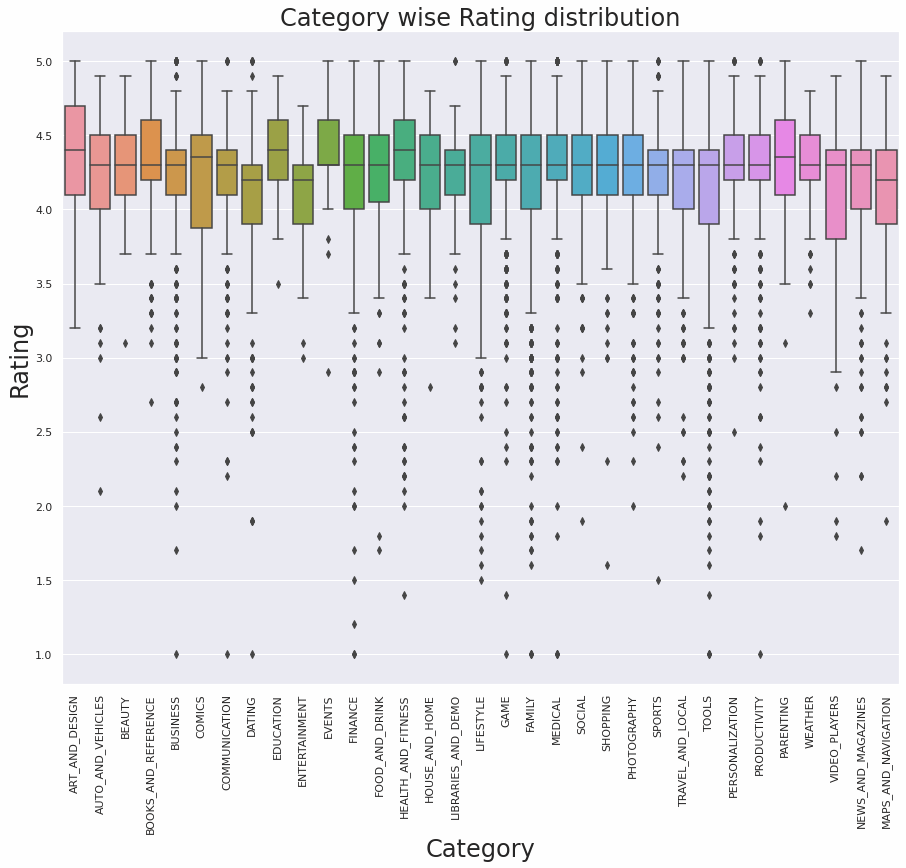

In [ ]:
# 11. Category wise rating distribution

rating = pd.concat([data['Rating'], data['Category']],axis = 1)

sns.boxplot(x = 'Category',y = 'Rating', data = rating).set(title = 'Category wise Rating distribution')
plt.xticks(rotation=90, size = 11)
plt.yticks(size = 11)
plt.show()

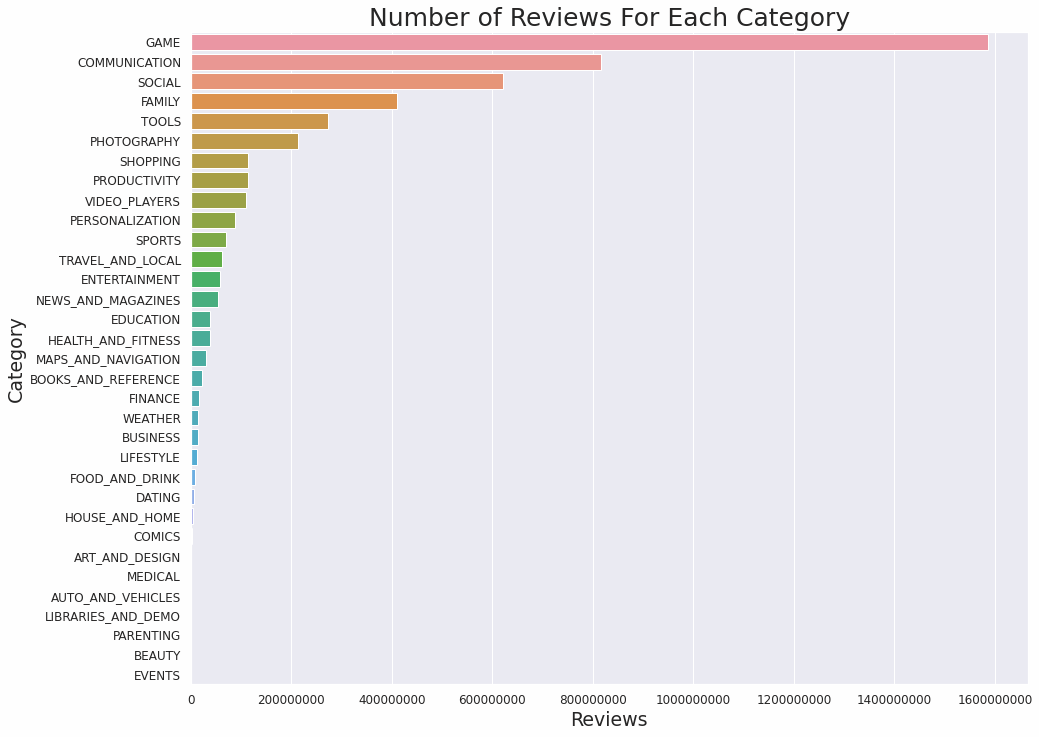

In [ ]:
# 12. Plotting review distribution with respect to category

categories = data.groupby('Category')
category_reviews_sum_df = categories[['Reviews']].sum().sort_values(by = ['Reviews'], ascending = False)
category_reviews_sum_df = category_reviews_sum_df.reset_index()  

graph = sns.barplot(x='Reviews', y='Category', data=category_reviews_sum_df)
plt.xticks(size = 11)
plt.yticks(size = 11)

graph.set_xlabel('Reviews', fontsize = 19)
graph.set_ylabel('Category', fontsize = 19)

graph.tick_params(labelsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Number of Reviews For Each Category',fontsize = 25)
plt.show()

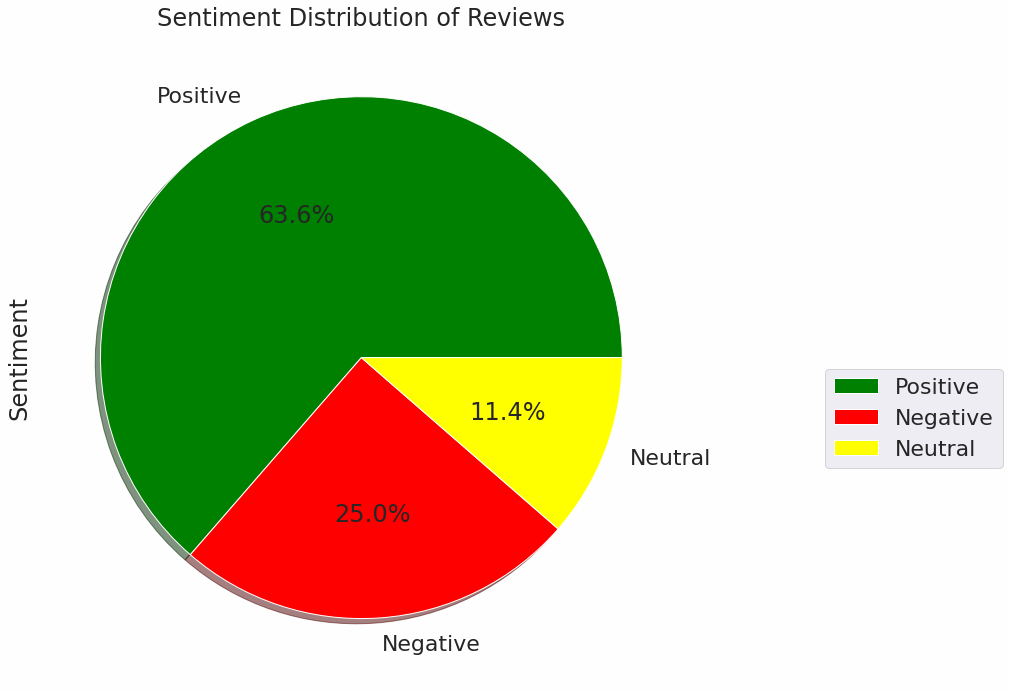

In [ ]:
# 13. Sentiment distribution plot extracted from merged mapping of datasets

pie = merged_df['Sentiment'].value_counts(sort=True)
pie.plot(kind = 'pie', autopct='%1.1f%%', legend = True, colors = ["green", "red", "yellow"], shadow = True)
plt.title("Sentiment Distribution of Reviews")
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))
plt.show()

Sentiment subjectivity refers to the degree to which the person is personally involved with the app; meaning that the amount of personal connections and individual experiences shared in the review.

Sentiment polarity refers to  the degree of polarity of the person's opinions. Like how stringly they loved or hated a particular app.

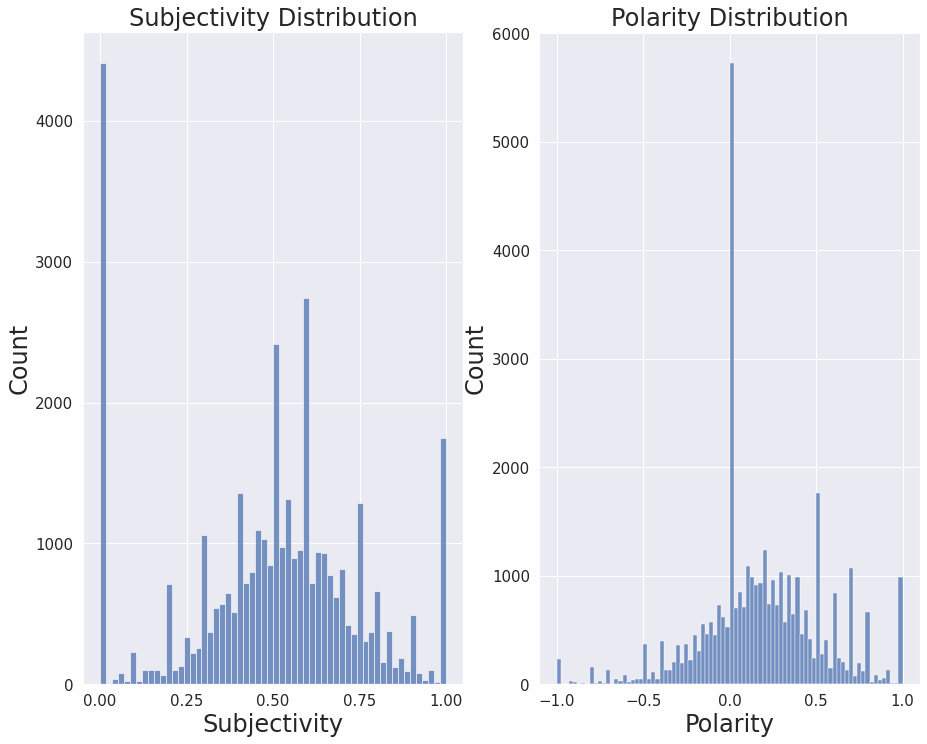

In [ ]:
# 14. Distribution of Subjectivity and Polarity
plt.subplot(1,2,1)
plt.xlabel("Subjectivity")
plt.title("Subjectivity Distribution")
sns.histplot(rev['Sentiment_Subjectivity'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.subplot(1,2,2)
plt.xlabel("Polarity")
plt.title("Polarity Distribution")
sns.histplot(rev['Sentiment_Polarity'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show();

Lower Subjectivity menas highly objective and less engaging review. Hence, it is inversely correlated with the relevance of the reviews. And polarity indicates an inclination of sentiments of the customer towards liking or hating an app.

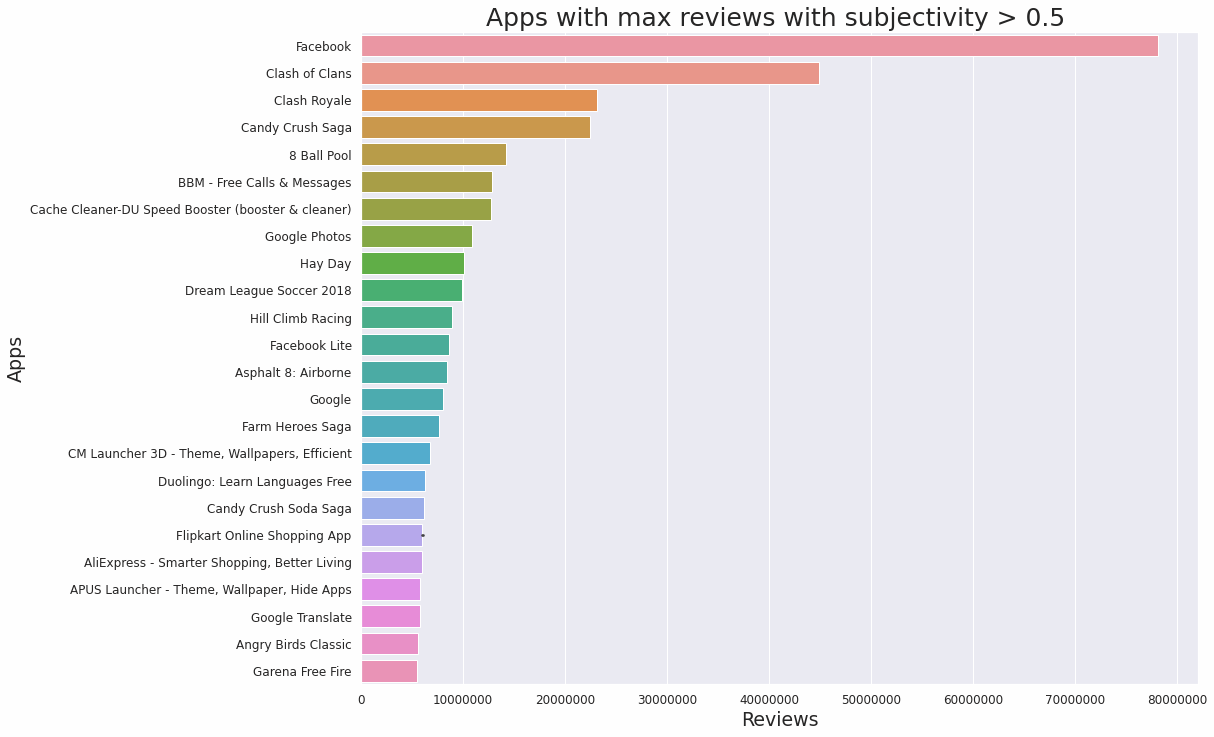

In [ ]:
# 15. Plot of apps with highest reviews filtered by sybjectivity > 0.5

m = merged_df[merged_df['Sentiment_Subjectivity'] > 0.5]

m = m.sort_values(by = ['Reviews'], ascending = False).head(5000)

graph = sns.barplot(x = 'Reviews', y = 'App', data=m)
plt.xticks(size = 11)
plt.yticks(size = 11)

graph.set_xlabel('Reviews', fontsize = 19)
graph.set_ylabel('Apps', fontsize = 19)
graph.tick_params(labelsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Apps with max reviews with subjectivity > 0.5 ',fontsize = 25)
plt.show()

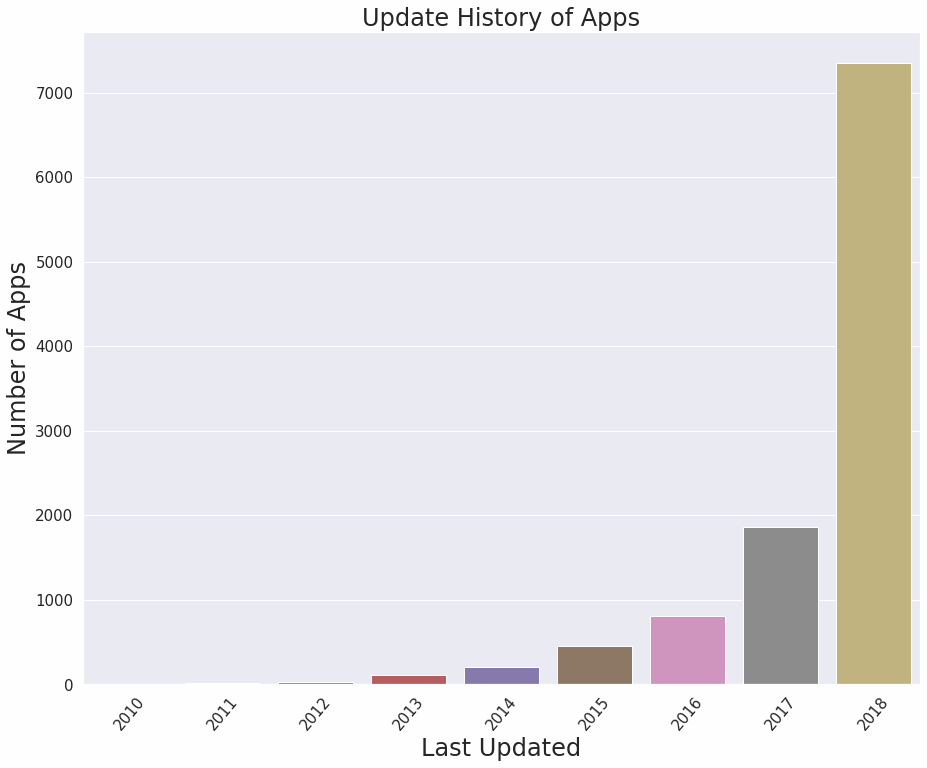

In [ ]:
# 16. Distribution showing last update history of apps

sns.countplot(data['Last Updated'])
plt.ylabel('Number of Apps')
plt.title('Update History of Apps')
plt.xticks(rotation=50, size = 15)
plt.yticks(size = 15)
plt.show()

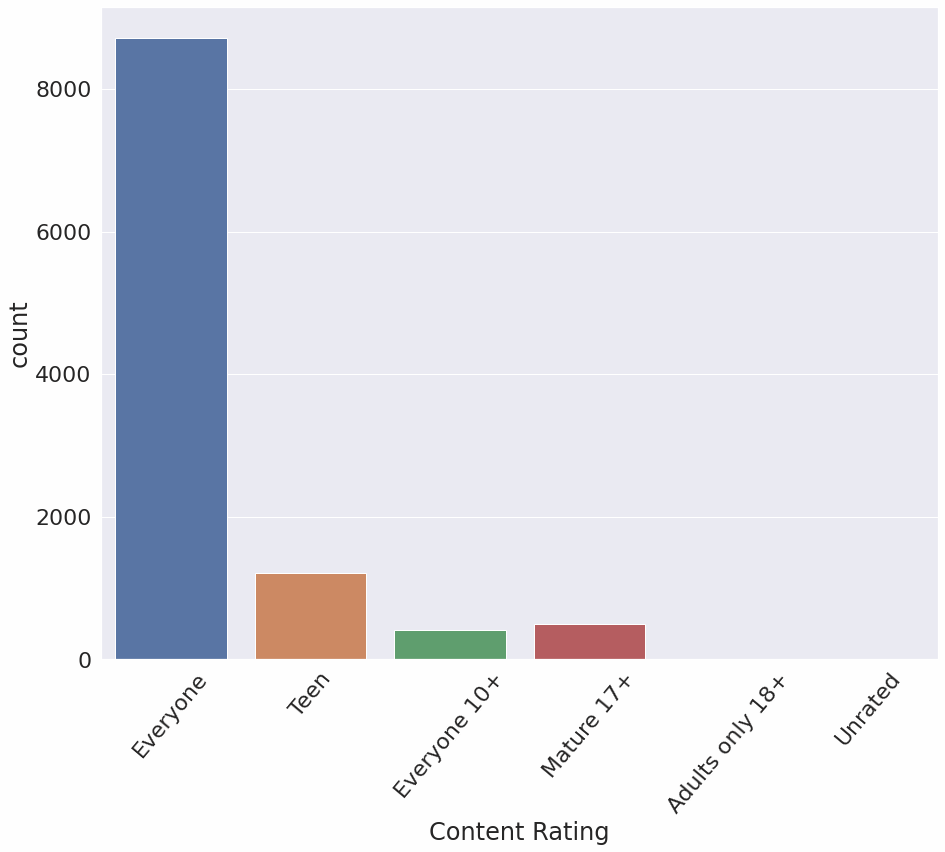

In [ ]:
# 17. Distribution of app avalibility with age requirements

sns.countplot(data['Content Rating'])
plt.xticks(rotation=50)
plt.show()

In [ ]:
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#The End
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

''